In [ ]:
!pip install yfinance

In [ ]:
pip install pmdarima

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [ ]:
#set ticker
BSE = yf.Ticker("^BSESN")

In [ ]:
BSE.info

{'algorithm': None,
 'ask': 0,
 'askSize': 0,
 'averageDailyVolume10Day': 10375,
 'averageVolume': 17435,
 'averageVolume10days': 10375,
 'beta': None,
 'bid': 0,
 'bidSize': 0,
 'circulatingSupply': None,
 'currency': 'INR',
 'dayHigh': 50028.67,
 'dayLow': 48580.8,
 'dividendRate': None,
 'dividendYield': None,
 'exDividendDate': None,
 'exchange': 'BSE',
 'exchangeTimezoneName': 'Asia/Kolkata',
 'exchangeTimezoneShortName': 'IST',
 'expireDate': None,
 'fiftyDayAverage': 50335.527,
 'fiftyTwoWeekHigh': 52516.76,
 'fiftyTwoWeekLow': 28602.31,
 'fiveYearAvgDividendYield': None,
 'forwardPE': None,
 'fromCurrency': None,
 'gmtOffSetMilliseconds': '19800000',
 'isEsgPopulated': False,
 'lastMarket': None,
 'logo_url': '',
 'market': 'in_market',
 'marketCap': None,
 'maxAge': 1,
 'maxSupply': None,
 'messageBoardId': 'finmb_INDEXBSESN',
 'navPrice': None,
 'open': 50020.91,
 'openInterest': None,
 'payoutRatio': None,
 'previousClose': 50029.83,
 'priceHint': 2,
 'priceToSalesTrailing12

In [ ]:
# get historical market data
hist = BSE.history(start="2010-01-01",  end="2021-05-5")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,28200,0,0
2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,27000,0,0
2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,21400,0,0
2010-01-07,17701.970703,17733.339844,17566.539062,17615.720703,18000,0,0
2010-01-08,17603.869141,17658.119141,17508.960938,17540.289062,17200,0,0


In [ ]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-26,48969.250000,49234.660156,48699.910156,49008.500000,10600,0,0
2021-03-30,49331.679688,50268.449219,49331.679688,50136.578125,10500,0,0
2021-03-31,50049.121094,50050.320312,49442.500000,49509.148438,11900,0,0
2021-04-01,49868.531250,50092.480469,49478.531250,50029.828125,8500,0,0
2021-04-05,50020.910156,50028.671875,48580.800781,49159.320312,0,0,0


In [ ]:
hist.shape

(2763, 7)

In [ ]:
#check missing values
hist.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2763 entries, 2010-01-04 to 2021-04-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2763 non-null   float64
 1   High          2763 non-null   float64
 2   Low           2763 non-null   float64
 3   Close         2763 non-null   float64
 4   Volume        2763 non-null   int64  
 5   Dividends     2763 non-null   int64  
 6   Stock Splits  2763 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 172.7 KB


Text(0, 0.5, 'Close')

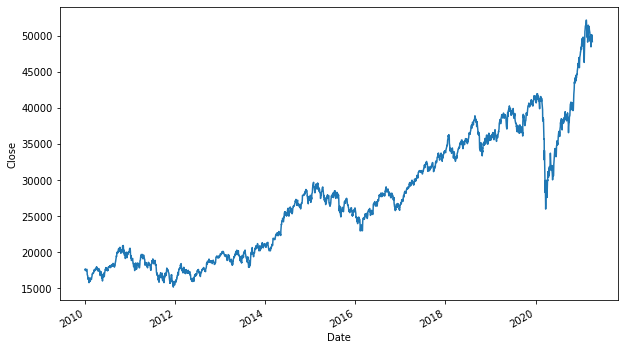

In [ ]:
plt.figure(figsize=(10, 6))
hist.Close.plot()
plt.ylabel('Close')

Training and test datasets:- 

It is important we do not randomly pick training and testing datasets. In stock price prediction, we have to use the test data always the recent dataset give a better result for our prediction.

Training dataset is 80% of the total dataset while the test dataset the remaining 20%.





In [ ]:
X_train = hist[:2210]
X_test = hist[2211:]

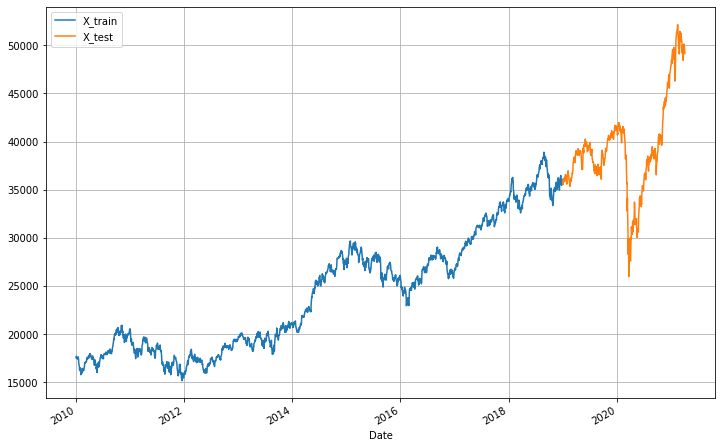

In [ ]:
plt.figure(figsize=(12,8));
ax =X_train['Close'].plot(grid =True, figsize = (12, 8));
X_test['Close'].plot(ax=ax, grid=True);
plt.legend(['X_train', 'X_test']);
plt.show()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(X_train['Close'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(X_train['Close'])        

ADF Test Statistic : -0.19116615182475508
p-value : 0.9395664296077475
#Lags Used : 1
Number of Observations Used : 2208
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
X_train['Close_diff'] = X_train['Close']-X_train['Close'].shift(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_train.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_diff
Date,,,,,,,,
2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,28200,0,0,NaN
2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,27000,0,0,127.509766
2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,21400,0,0,14.890625
2010-01-07,17701.970703,17733.339844,17566.539062,17615.720703,18000,0,0,-85.410156
2010-01-08,17603.869141,17658.119141,17508.960938,17540.289062,17200,0,0,-75.431641
2010-01-11,17724.589844,17776.570312,17500.789062,17526.710938,18400,0,0,-13.578125
2010-01-12,17534.099609,17612.000000,17392.550781,17422.509766,18600,0,0,-104.201172
2010-01-13,17368.029297,17528.310547,17276.460938,17509.800781,26200,0,0,87.291016
2010-01-14,17525.710938,17628.039062,17525.710938,17584.869141,23400,0,0,75.068359


In [ ]:
# Again test dickey fuller test
adfuller_test(X_train['Close_diff'].dropna())

ADF Test Statistic : -43.745800122868616
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 2208
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Text(0, 0.5, 'Closed_diff')

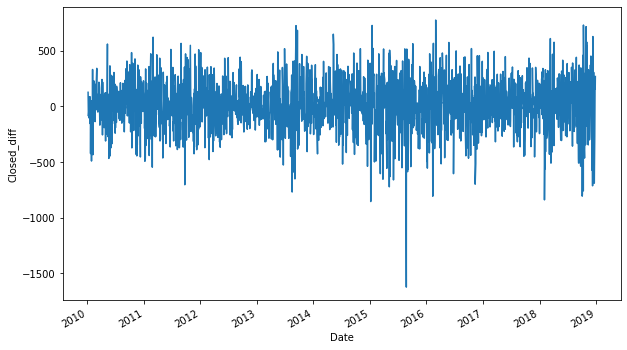

In [ ]:
#see Stationary
plt.figure(figsize=(10, 6))
X_train.Close_diff.plot()
plt.ylabel('Closed_diff')

Auto Regressive Model

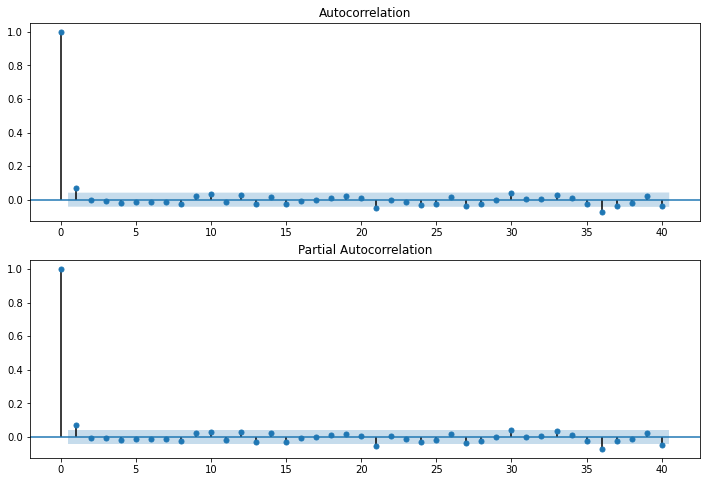

In [ ]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(X_train['Close_diff'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(X_train['Close_diff'].dropna(),lags=40,ax=ax2)

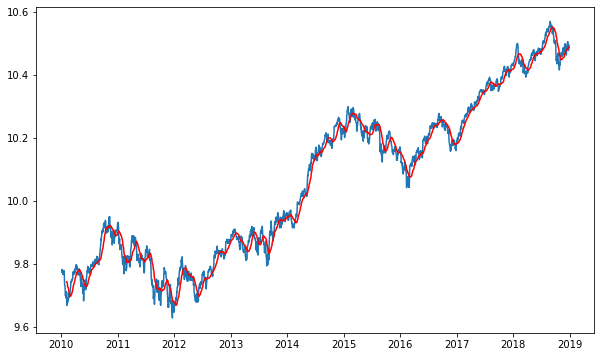

In [ ]:
train_log = np.log(X_train['Close']) 
test_log = np.log(X_test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red') 

In [ ]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

adfuller_test(train_log)

ADF Test Statistic : -0.5214858458694194
p-value : 0.8877550427889989
#Lags Used : 1
Number of Observations Used : 2208
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

adfuller_test(train_log_diff)

ADF Test Statistic : -10.091509327605936
p-value : 1.1189906805454746e-17
#Lags Used : 12
Number of Observations Used : 2174
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(X_test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14224.373, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14221.154, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14228.316, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14228.386, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14220.644, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14226.386, Time=0.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14226.387, Time=1.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14224.559, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14228.160, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.315 seconds


Text(0, 0.5, 'Actual Stock Price')

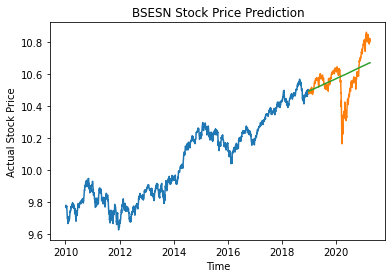

In [ ]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [ ]:
#Calculating error
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.11251966799446278


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2209
Model:               SARIMAX(0, 0, 1)   Log Likelihood              -15062.269
Date:                Mon, 05 Apr 2021   AIC                          30130.538
Time:                        18:18:53   BIC                          30147.639
Sample:                             0   HQIC                         30136.785
                               - 2209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.8203      5.144      1.520      0.128      -2.261      17.902
ma.L1          0.0716      0.019      3.761      0.000       0.034       0.109
sigma2      4.906e+04   1062.993     46.155      0.000     4.7e+04    5.11e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               389.26
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""